In [1]:
import kagglehub
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version of fashion mnist dataset
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:03<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
# Load training and testing datasets
train_df = pd.read_csv(path + '/fashion-mnist_train.csv', index_col=False)   # 60,000 train images
test_df = pd.read_csv(path + '/fashion-mnist_test.csv', index_col = False)     # 10,000 test images

 The **MNIST Fashion** dataset, where each row represents a single grayscale image of a fashion item.

**Label Column:** The first column, labeled label, contains the class label for each image. This label is an integer (from 0 to 9) representing a specific type of fashion item:

*   0 = T-shirt/top
*   1 = Trouser
*   2 = Pullover
*   3 = Dress
*   4 = Coat
*   5 = Sandal
*   6 = Shirt
*   7 = Sneaker
*   8 = Bag
*   9 = Ankle boot

















In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_X = train_df.drop('label', axis=1) / 255.0  # Normalize pixel values
train_y = train_df['label'].values

test_X = test_df.drop('label', axis=1) / 255.0    # Normalize pixel values
test_y = test_df['label'].values

# Reshape the feature data to 28x28x1 format
train_X = train_X.values.reshape(-1, 28, 28, 1)
test_X = test_X.values.reshape(-1, 28, 28,1)

In [17]:
print(train_X.shape)

print(train_y.shape)

print(test_X.shape)

print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


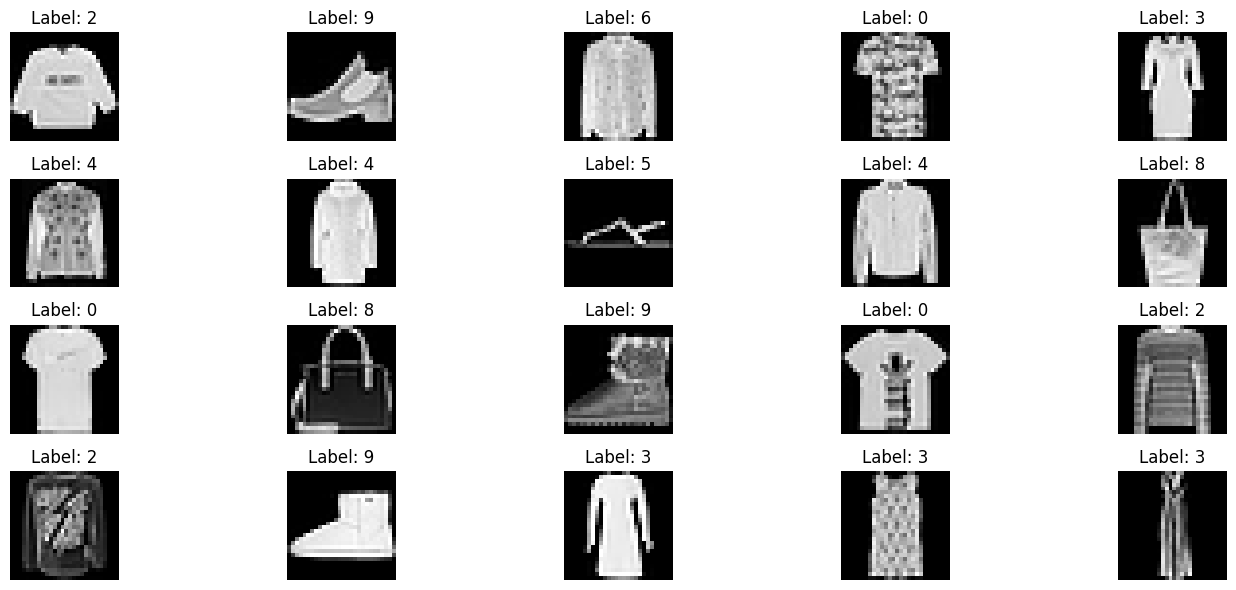

In [18]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Display the first 20 images
for i in range(20):
    ax = axes[i // 5, i % 5]  # Determine the subplot position
    ax.imshow(train_X[i], cmap='gray')  # Display the image
    ax.set_title(f"Label: {train_y[i]}")  # Set the title
    ax.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

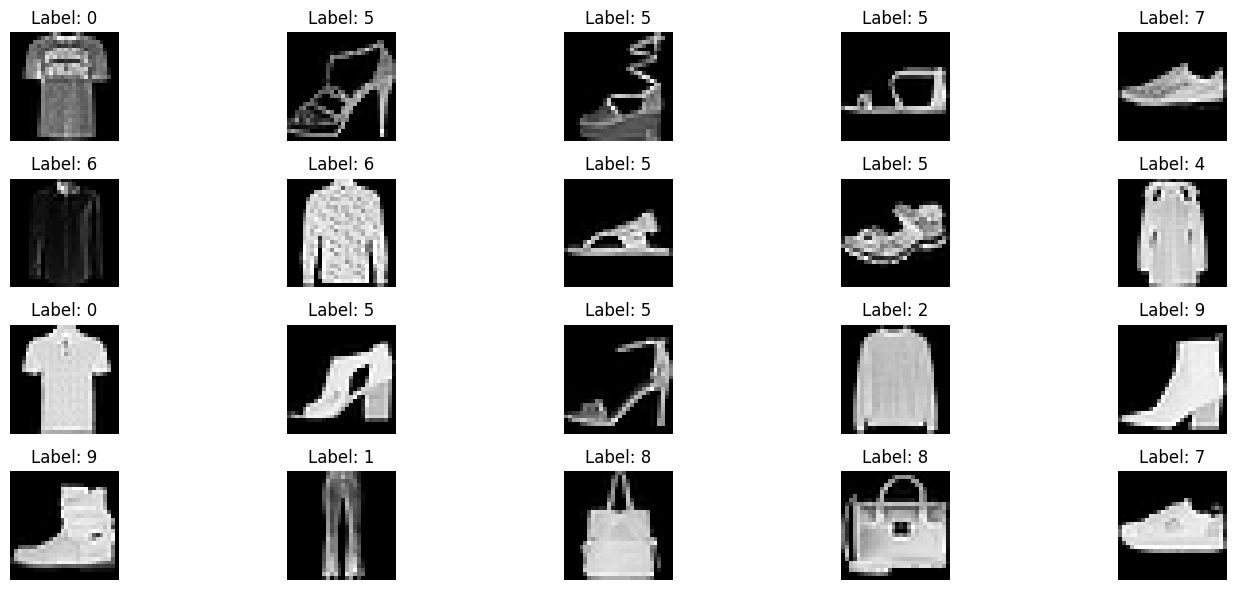

In [19]:
# Display the last 20 images
num_images = 20
start_index = train_X.shape[0] - num_images

fig, axes = plt.subplots(4, 5, figsize=(15, 6))  # 4 rows, 5 columns

# Display the last images
for i in range(num_images):
    ax = axes[i // 5, i % 5]  # Determine the subplot position
    ax.imshow(train_X[start_index + i], cmap='gray')  # Display the image
    ax.set_title(f"Label: {train_y[start_index + i]}")  # Set the title
    ax.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


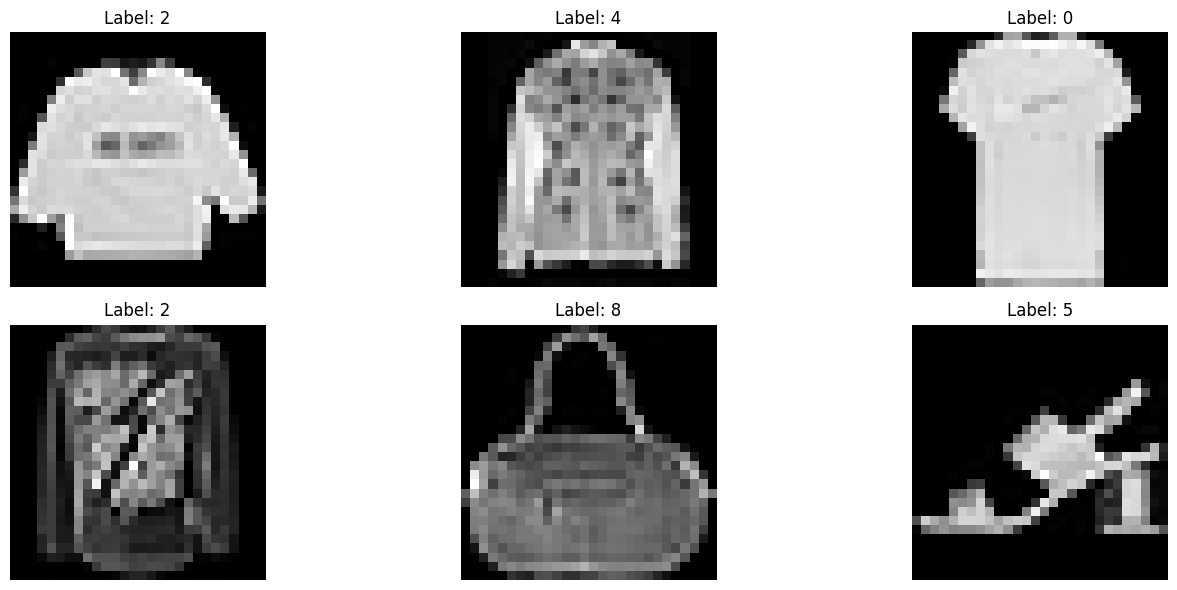

In [20]:
# Specify the indices of the images you want to display
specific_indices = [0, 5, 10, 15, 20,50]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Display the specific images
for i, idx in enumerate(specific_indices):
    ax = axes[i // (len(specific_indices) // 2), i % (len(specific_indices) // 2)]  # Determine subplot position
    ax.imshow(train_X[idx], cmap='gray')  # Display the image
    ax.set_title(f"Label: {train_y[idx]}")  # Set the title
    ax.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [21]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [25]:
# Apply augmentation to training data
augmented_images = []
augmented_labels = []
for X, y in zip(train_X, train_y):
    for _ in range(5):  # Generate 5 augmented images per original image
        augmented_image = datagen.random_transform(X)
        augmented_images.append(augmented_image)
        augmented_labels.append(y)

In [26]:
# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

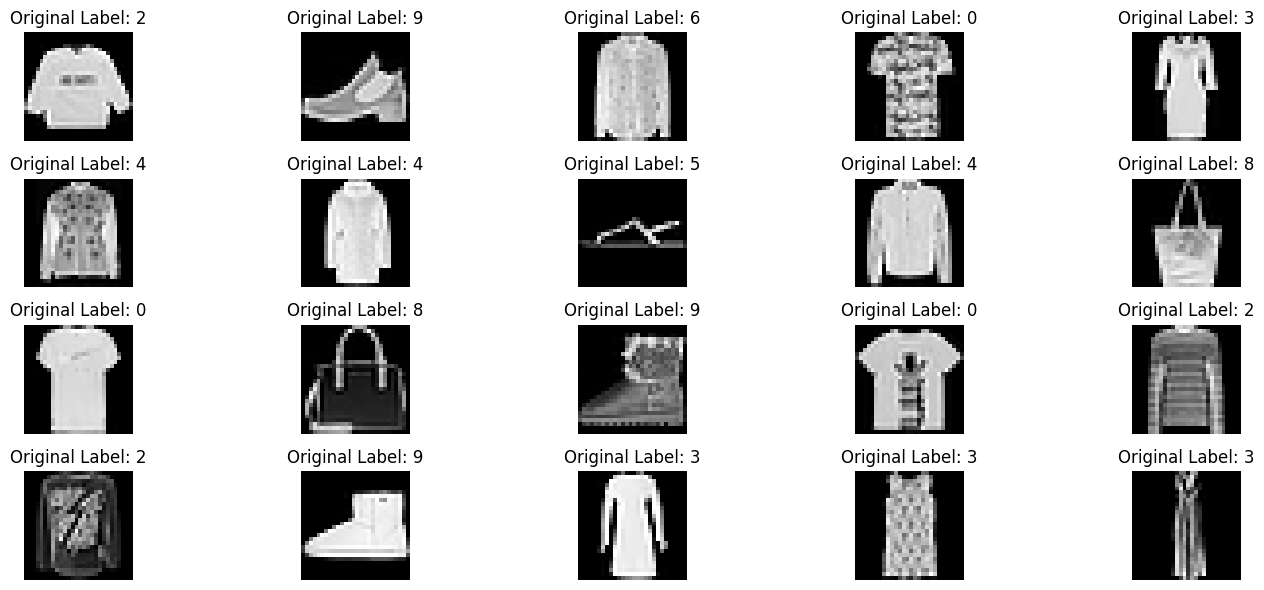

In [27]:
# Display original and augmented images
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_X[i], cmap='gray')
    ax.set_title(f"Original Label: {train_y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

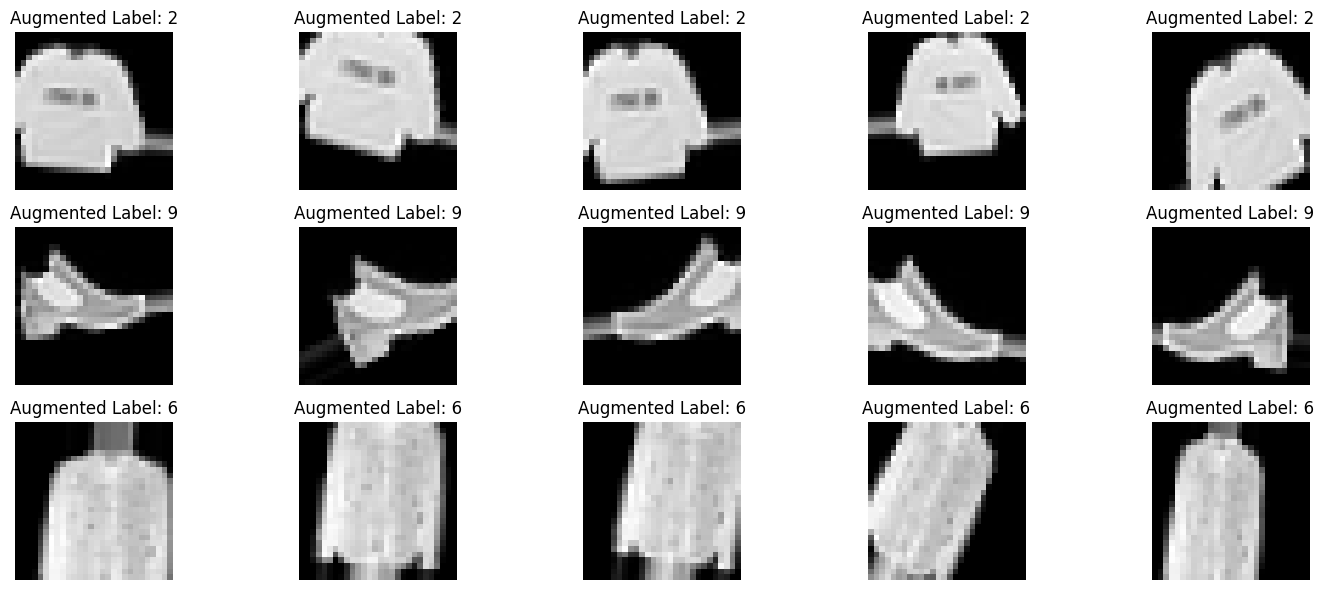

In [28]:
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
for i in range(15):
    ax = axes[i // 5, i % 5]
    ax.imshow(augmented_images[i], cmap='gray')
    ax.set_title(f"Augmented Label: {augmented_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()